In [11]:
import numpy as np
from numpy import pi
from math import dist

In [273]:
def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

# C1

In [263]:
def distance_C1(x, y, a, b):
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2] + 2*pi * option_c])
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [264]:
def generate_c1_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(2*pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [265]:
isoms = generate_c1_isoms(1000, 6, 6)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],6,6)

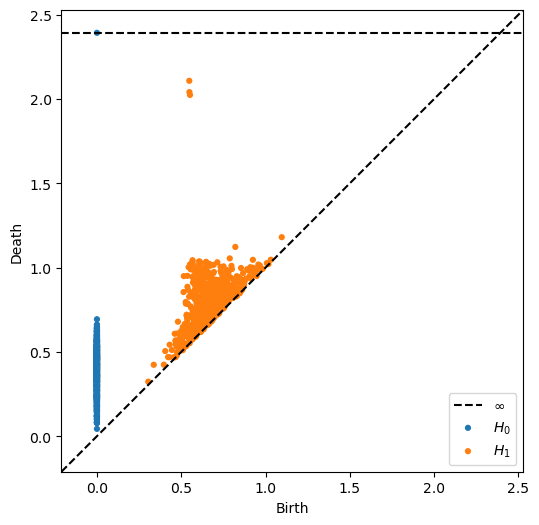

In [266]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [267]:
persistent_H1_intervals(output)

[1.5601078271865845,
 1.4924030303955078,
 1.4720627069473267,
 0.4766578674316406,
 0.46797239780426025,
 0.4659692645072937,
 0.46458178758621216,
 0.4630412459373474,
 0.45967262983322144,
 0.4587751030921936,
 0.44896435737609863,
 0.44478505849838257,
 0.44281476736068726,
 0.44185328483581543,
 0.43419235944747925,
 0.43333899974823,
 0.4313300848007202,
 0.4302629828453064,
 0.42586392164230347,
 0.4236220717430115,
 0.4191405773162842,
 0.413943350315094,
 0.41372936964035034,
 0.4095337986946106,
 0.4080926179885864,
 0.4012444019317627,
 0.39954376220703125,
 0.3889661431312561,
 0.388003945350647,
 0.38721132278442383,
 0.37880510091781616,
 0.3784623146057129,
 0.37807929515838623,
 0.3777541518211365,
 0.37320148944854736,
 0.37304288148880005,
 0.3729655146598816,
 0.3674532175064087,
 0.3614075779914856,
 0.36072415113449097,
 0.3578433394432068,
 0.35774409770965576,
 0.3570408821105957,
 0.35491931438446045,
 0.35004353523254395,
 0.3498060703277588,
 0.349178791046142

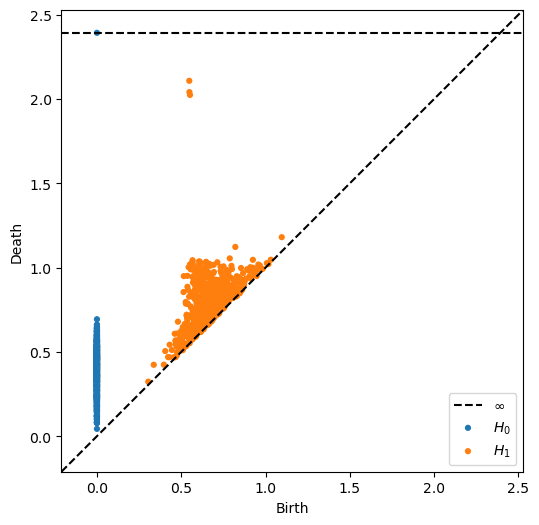

In [268]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [269]:
persistent_H1_intervals(output)

[1.5601078271865845,
 1.4924030303955078,
 1.4720627069473267,
 0.4766578674316406,
 0.46797239780426025,
 0.4659692645072937,
 0.46458178758621216,
 0.4630412459373474,
 0.45967262983322144,
 0.4587751030921936,
 0.44896435737609863,
 0.44478505849838257,
 0.44281476736068726,
 0.44185328483581543,
 0.43419235944747925,
 0.43333899974823,
 0.4313300848007202,
 0.4302629828453064,
 0.42586392164230347,
 0.4236220717430115,
 0.4191405773162842,
 0.413943350315094,
 0.41372936964035034,
 0.4095337986946106,
 0.4080926179885864,
 0.4012444019317627,
 0.39954376220703125,
 0.3889661431312561,
 0.388003945350647,
 0.38721132278442383,
 0.37880510091781616,
 0.3784623146057129,
 0.37807929515838623,
 0.3777541518211365,
 0.37320148944854736,
 0.37304288148880005,
 0.3729655146598816,
 0.3674532175064087,
 0.3614075779914856,
 0.36072415113449097,
 0.3578433394432068,
 0.35774409770965576,
 0.3570408821105957,
 0.35491931438446045,
 0.35004353523254395,
 0.3498060703277588,
 0.349178791046142

# C2

In [291]:
def distance_C2(x, y, a, b):
    
    # no translation in rotation axis
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2]])
    
    # translate up 
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] + pi])
        
    # translate down
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] - pi])
            
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [283]:
def generate_c2_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [284]:
isoms = generate_c2_isoms(1000, 3, 3)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],3,3)

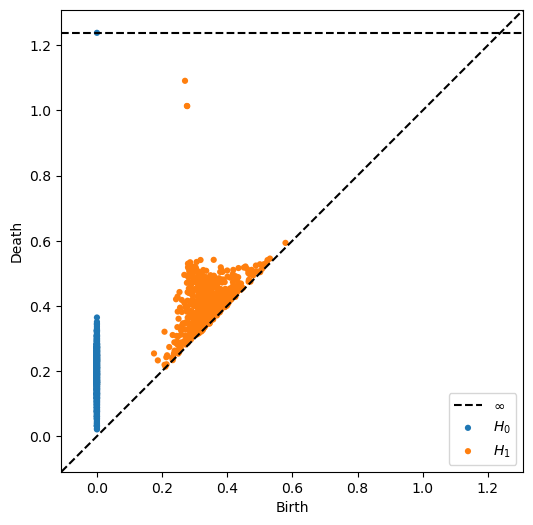

In [285]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [286]:
persistent_H1_intervals(output)

[0.8207438886165619,
 0.7377379536628723,
 0.7360919713973999,
 0.25016531348228455,
 0.2478313446044922,
 0.2419012188911438,
 0.23906904458999634,
 0.23441272974014282,
 0.2336842119693756,
 0.23238015174865723,
 0.2289644181728363,
 0.22707146406173706,
 0.22676587104797363,
 0.22583356499671936,
 0.2235281765460968,
 0.22290340065956116,
 0.22153562307357788,
 0.21956926584243774,
 0.21639838814735413,
 0.21512651443481445,
 0.21070295572280884,
 0.20926210284233093,
 0.2089376449584961,
 0.20865169167518616,
 0.20693781971931458,
 0.20619899034500122,
 0.2049630582332611,
 0.2044340968132019,
 0.20440897345542908,
 0.20405036211013794,
 0.2029256522655487,
 0.195875346660614,
 0.19461601972579956,
 0.19337791204452515,
 0.19204163551330566,
 0.18907380104064941,
 0.1866857409477234,
 0.18544387817382812,
 0.18365761637687683,
 0.18295449018478394,
 0.1810402125120163,
 0.1807791292667389,
 0.18027165532112122,
 0.18025454878807068,
 0.177626371383667,
 0.17732703685760498,
 0.1770

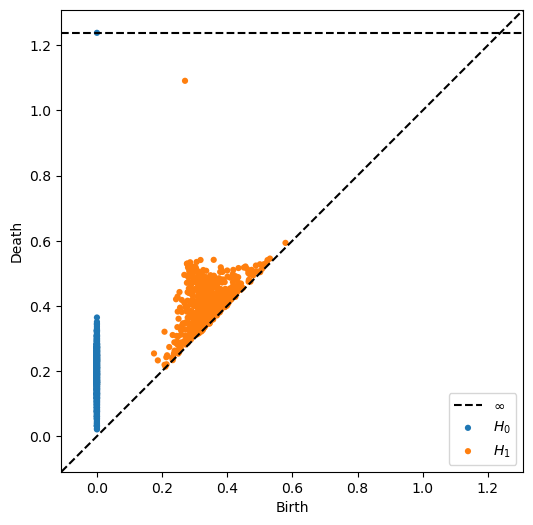

In [287]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [288]:
persistent_H1_intervals(output)

[0.8207438886165619,
 0.25353455543518066,
 0.2523283362388611,
 0.2478313446044922,
 0.24733129143714905,
 0.2419012188911438,
 0.23906904458999634,
 0.23441272974014282,
 0.2336842119693756,
 0.23238015174865723,
 0.2289644181728363,
 0.22707146406173706,
 0.22676587104797363,
 0.22583356499671936,
 0.2235281765460968,
 0.22290340065956116,
 0.22153562307357788,
 0.21956926584243774,
 0.21639838814735413,
 0.21512651443481445,
 0.21070295572280884,
 0.20926210284233093,
 0.2089376449584961,
 0.20865169167518616,
 0.20693781971931458,
 0.20619899034500122,
 0.2049630582332611,
 0.2044340968132019,
 0.20440897345542908,
 0.20405036211013794,
 0.2029256522655487,
 0.195875346660614,
 0.19461601972579956,
 0.19337791204452515,
 0.19204163551330566,
 0.18907380104064941,
 0.1866857409477234,
 0.18544387817382812,
 0.18365761637687683,
 0.18295449018478394,
 0.1810402125120163,
 0.1807791292667389,
 0.18027165532112122,
 0.18025454878807068,
 0.177626371383667,
 0.17732703685760498,
 0.177

# C4

In [294]:
def distance_C4(x, y, a):
    
    # no translation in rotation axis
    Y = []
    options = [-1,0,1]
    for option_1 in options:
        for option_2 in options:
            Y.append([y[0] + a * option_1, y[1] + a * option_2, y[2]])
            
    # translate up 
    options = [-1,0,1]
    for option_1 in options:
        for option_2 in options:
            Y.append([a - y[1] + a * option_1, y[0] + a * option_2, y[2] + pi/2])
    
    # translate down
    options = [-1,0,1]
    for option_1 in options:
        for option_2 in options:
            Y.append([y[1] + a * option_1, -y[0] + a + a * option_2, y[2] - pi/2])
            
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [295]:
def generate_c4_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(pi/2 * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [ ]:
isoms = generate_c4_isoms(1000, 1, 1)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C4(isoms[i], isoms[j], 1)